**Задача 1:**

Цель задания: Исследовать применение алгоритма K-ближайших соседей (KNN) для задачи классификации видов ирисов. Оптимизировать количество соседей с целью повышения качества классификации, измеряемого взвешенным F1-счетом.



Задачи:

Загрузка и предварительная обработка данных

Используйте функцию load_iris из sklearn.datasets для загрузки датасета.
Разделите данные на признаки и целевую переменную.
Разделите набор данных на обучающую и тестовую выборки с пропорцией 70% на 30%.


Масштабирование признаков

Произведите масштабирование признаков, используя MinMaxScaler из sklearn.preprocessing.


Обучение модели KNN и её оценка

Обучите модель KNN с начальным числом соседей, равным 5.
Оцените качество классификации с использованием отчета о классификации и матрицы ошибок.


Оптимизация гиперпараметров с использованием GridSearchCV

Примените GridSearchCV из sklearn.model_selection для нахождения оптимального числа соседей, фокусируясь на максимизации взвешенного F1-счета.
Оцените качество классификации оптимальной модели с использованием отчета о классификации и матрицы ошибок.


Анализ влияния количества соседей на качество классификации

Исследуйте, как изменение числа соседей влияет на взвешенный F1-счет. Визуализируйте результаты с помощью графика.



Требования к отчету:

Предоставьте код, который вы использовали для выполнения каждого из шагов задания.
Опишите ваши наблюдения по результатам каждого этапа выполнения задания, включая оценку модели и оптимизацию гиперпараметров.
Проанализируйте, как количество соседей влияет на качество классификации и определите оптимальное их число для данной задачи.

In [39]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier

data = datasets.load_iris()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

scaler = MinMaxScaler()
X_tr_scaled = scaler.fit_transform(X_train)
X_tr_scaled = pd.DataFrame(X_tr_scaled, columns=data.feature_names)
X_t_scaled = scaler.transform(X_test)
X_t_scaled = pd.DataFrame(X_t_scaled, columns=data.feature_names)

In [40]:
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(X_tr_scaled,y_train)
prediction = knc.predict(X_t_scaled)
print(f"Report:\n{classification_report(y_test, prediction)}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, prediction)}")

Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        16
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Confusion matrix:
[[14  0  0]
 [ 0 15  1]
 [ 0  1 14]]


In [41]:
params = {'n_neighbors': range(2,21)}
knc = KNeighborsClassifier()
knc_search = GridSearchCV(param_grid = params, estimator = knc, scoring='f1_weighted', cv=3)
knc_search.fit(X_tr_scaled, y_train)
knc_search.best_params_

{'n_neighbors': 6}

In [42]:
knc = KNeighborsClassifier(n_neighbors=6)
knc.fit(X_tr_scaled,y_train)
prediction = knc.predict(X_t_scaled)
print(f"Report:\n{classification_report(y_test, prediction)}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, prediction)}")

Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.89      1.00      0.94        16
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Confusion matrix:
[[14  0  0]
 [ 0 16  0]
 [ 0  2 13]]


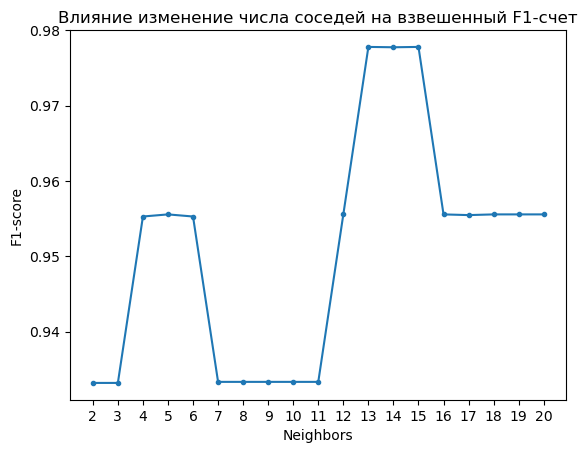

In [43]:
import matplotlib.pyplot as plt

scores = []
for i in range(2,21):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(X_tr_scaled,y_train)
    prediction = knc.predict(X_t_scaled)
    scores.append(f1_score(y_test, prediction, average='weighted'))

    
plt.plot(range(2,21), scores, marker='.')
plt.title('Влияние изменение числа соседей на взвешенный F1-счет')
plt.xlabel('Neighbors')
plt.xticks(range(2, 21))
plt.ylabel('F1-score')
plt.show()

**Отчет**:

По графику мы можем видеть, что взвешенная f1 мера показвает локальные максимумы в двух интервалах.(4-6 и 13-15) В интервале 13-15 значения показывают переобученность модели. Этому соответствует лучший параметр по GridSearch равная 6 соседям.  

**Задача 2:**

Цель задания: Использовать алгоритм K-ближайших соседей (KNN) для прогнозирования средней стоимости домовладений в различных блоках Калифорнии. Оптимизировать количество соседей для достижения минимальной ошибки предсказания, измеряемой среднеквадратичной ошибкой (RMSE).



Задачи:

Загрузка и предварительная обработка данных

Используйте функцию fetch_california_housing из sklearn.datasets для загрузки датасета.
Преобразуйте полученные данные в pandas DataFrame, добавьте названия столбцов и целевую переменную.
Разделите данные на набор признаков (X) и целевую переменную (y).


Разбиение данных на обучающую и тестовую выборки

Используйте функцию train_test_split для разбиения данных на обучающую и тестовую выборки в соотношении 70% к 30%.


Масштабирование признаков

Примените MinMaxScaler для масштабирования признаков обучающей и тестовой выборок.


Обучение модели и оценка результатов

Обучите модель KNN с начальным числом соседей равным 5.
Вычислите RMSE для оценки качества модели на тестовой выборке.


Оптимизация количества соседей

Исследуйте, как изменение количества соседей влияет на RMSE, путем изменения n_neighbors от 2 до 20.
Визуализируйте результаты, чтобы найти оптимальное количество соседей.


Требования к отчету:

В отчете должен быть представлен исходный код, используемый для выполнения каждого шага задания.
Проанализируйте и объясните результаты оценки модели и её оптимизации. Как количество соседей влияет на RMSE? Какое количество соседей является оптимальным для данной задачи?
Включите в отчет графики и выводы, подтверждающие ваши анализы и решения.

In [44]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.neighbors import KNeighborsRegressor

data = datasets.fetch_california_housing()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

scaler = MinMaxScaler()
X_tr_scaled = scaler.fit_transform(X_train)
X_tr_scaled = pd.DataFrame(X_tr_scaled, columns=data.feature_names)
X_t_scaled = scaler.transform(X_test)
X_t_scaled = pd.DataFrame(X_t_scaled, columns=data.feature_names)

In [45]:
knc = KNeighborsRegressor(n_neighbors=5)
knc.fit(X_tr_scaled,y_train)
prediction = knc.predict(X_t_scaled)
print(f"RMSE:\n{MSE(y_test, prediction) ** (1/2)}")

RMSE:
0.6490081141044226


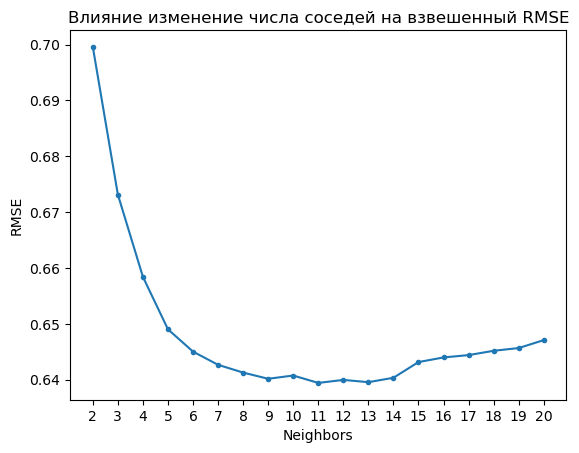

In [46]:
scores = []
for i in range(2,21):
    knc = KNeighborsRegressor(n_neighbors=i)
    knc.fit(X_tr_scaled,y_train)
    prediction = knc.predict(X_t_scaled)
    scores.append(MSE(y_test, prediction) ** (1/2))

    
plt.plot(range(2,21), scores, marker='.')
plt.xticks(range(2, 21))
plt.title('Влияние изменение числа соседей на взвешенный RMSE')
plt.xlabel('Neighbors')
plt.ylabel('RMSE')
plt.show()

**Отчет**:

По графику мы можем видеть, что среднеквадратичная ошибка показвает лучшее значение в 11 соседях. Чем больше соседей - тем меньше среднеквадратичная ошибка.

**Задача 3:**

Цель: Исследовать влияние количества кластеров на качество кластеризации искусственного набора данных с использованием меры AMI (Adjusted Mutual Information).



Шаги:

Генерация данных: Сгенерировать набор данных, содержащий 1200 точек с 2 признаками и разделенный на 7 кластеров с помощью функции make_blobs.
KMeans кластеризация: Применить алгоритм KMeans к сгенерированным данным с разным количеством кластеров (от 2 до 10). Оценить качество кластеризации для каждого варианта с помощью меры AMI.
Визуализация результатов: Построить график, на котором по оси X отображено количество кластеров, а по оси Y - соответствующие значения AMI. Это позволит определить оптимальное количество кластеров для данного набора данных.

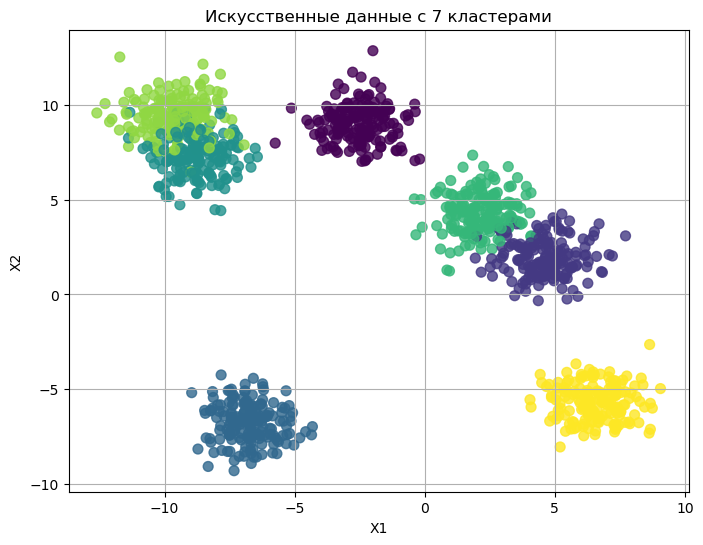

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1200, centers=7, n_features=2, random_state=42)


plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, alpha=0.8)
plt.title('Искусственные данные с 7 кластерами')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.show()

In [54]:
kmeans = KMeans(n_clusters=4, random_state=105, init='random', n_init=10)
kmeans.fit(X)
adjusted_mutual_info_score(y, kmeans.predict(X))

C:\Users\Swift\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


0.784075801911282

C:\Users\Swift\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Swift\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Swift\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\Swift\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

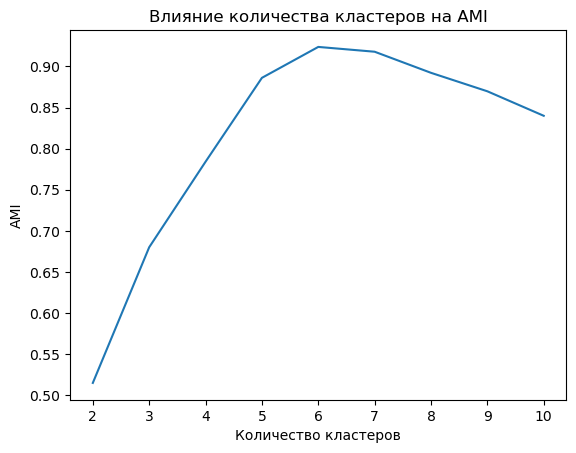

In [56]:
ami_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=105, init='random', n_init=10)
    kmeans.fit(X)
    ami_score_temp = adjusted_mutual_info_score(y, kmeans.predict(X))
    ami_scores.append(ami_score_temp)

plt.plot(range(2, 11), ami_scores)
plt.title('Влияние количества кластеров на AMI')
plt.xlabel('Количество кластеров')
plt.ylabel('AMI')
plt.show()